Analyzing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [2]:
import numpy as np
import pandas as pd
import matplotlib

---

Let's load the Gas production:

In [3]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [5]:
# Check how many rows and columns in the dataframe
gas_df.shape

(121, 20)

In [6]:
# Display all the available column names in the dataframe
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [13]:
# Display additional info about each columns such as data types and number of non-null values
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             121 non-null    object
 1   U.S.                              121 non-null    int64 
 2   Alaska                            121 non-null    int64 
 3   Arkansas                          121 non-null    int64 
 4   Kansas                            121 non-null    int64 
 5   Other States                      121 non-null    int64 
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64 
 7   Wyoming                           121 non-null    int64 
 8   West Virginia                     121 non-null    int64 
 9   Utah                              121 non-null    int64 
 10  Pennsylvania                      121 non-null    int64 
 11  Texas                             121 non-null    int64 
 12  Oklahoma              

In [16]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'])

### Check your code

In [17]:
month_type = gas_df['Month'].dtype

In [18]:
from nbresult import ChallengeResult

result = ChallengeResult('date',
    month_type=month_type,
)
result.write()

In [19]:
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_date.py::TestDate::test_month_column_is_a_datetime PASSED           [100%]

============================== 1 passed in 0.17s ===============================


💯 You can commit your code:

git add tests/date.pickle

git commit -m 'Completed date step'

git push origin master



In [20]:
gas_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

In [21]:
gas_df['Month'].dt.month.tail()

116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int64

---

## Yearly Gas production

In [31]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'])
gas_df['Year'] = gas_df['Month'].dt.year
yearly_gas_df = gas_df.groupby('Year').sum()

print(yearly_gas_df)

         U.S.  Alaska  Arkansas  Kansas  Other States  \
Year                                                    
2008   489473   64732      9395    7229         21678   
2009   856876  108986     22353   11689         36078   
2010   881622  105219     30475   10708         37542   
2011   936163  104154     35384   10191         38187   
2012   968632  103856     37571    9714         37045   
2013   970617  105776     37466    9613         22657   
2014  1032439  104298     36917    9415         20761   
2015  1082158  104447     33221    9349         20102   
2016  1070085  105900     26999    7984         18722   
2017  1090730  106969     23050    7247         17069   
2018   587058   54887      9991    3372          8129   

      Federal Offshore--Gulf of Mexico  Wyoming  West Virginia   Utah  \
Year                                                                    
2008                             39112    48393           4709   8726   
2009                             80346 

### Check your code

In [32]:
index_year = yearly_gas_df.index[0]
yearly_gas_shape = yearly_gas_df.shape
us_total = yearly_gas_df.iloc[0,0]

In [33]:
from nbresult import ChallengeResult

result = ChallengeResult('full_gas',
    index_year=index_year,
    yearly_gas_shape=yearly_gas_shape,
    us_total=us_total
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 3 items

test_full_gas.py::TestFullGas::test_df_has_the_right_index PASSED        [ 33%]
test_full_gas.py::TestFullGas::test_df_has_the_right_shape PASSED        [ 66%]
test_full_gas.py::TestFullGas::test_df_has_the_right_values PASSED       [100%]

============================== 3 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/full_gas.pickle

git commit -m 'Completed full_gas step'

git push origin master



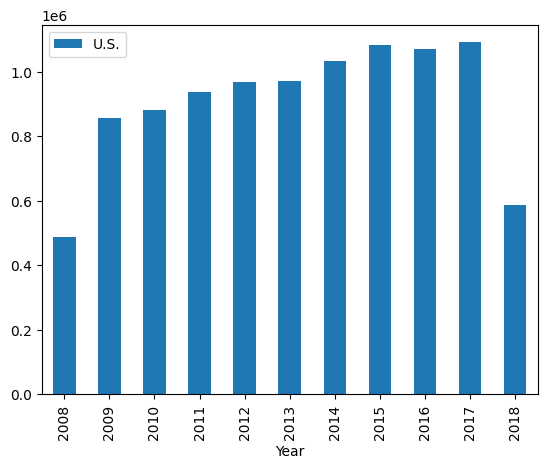

In [35]:
plot = yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year");

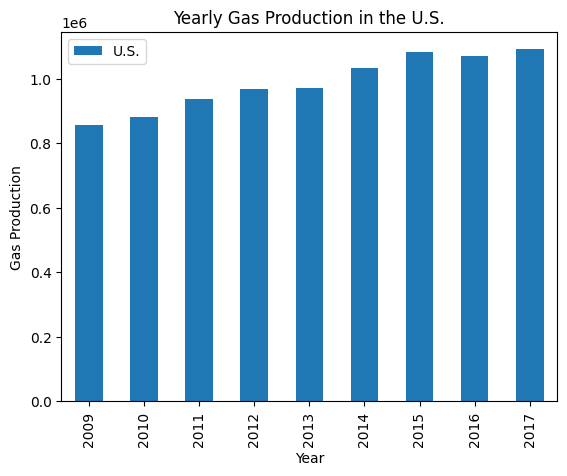

In [36]:
import numpy as np

condition = np.logical_and(yearly_gas_df.index > 2008, yearly_gas_df.index < 2018)
filtered_yearly_gas_df = yearly_gas_df[condition]

plot = filtered_yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year");
plot.set_ylabel("Gas Production");
plot.set_title("Yearly Gas Production in the U.S.");

### Check your code

In [37]:
from nbresult import ChallengeResult

result = ChallengeResult('filtered_gas',
    yearly_gas=filtered_yearly_gas_df.shape
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_filtered_gas.py::TestFilteredGas::test_yearly_gas_production_df_has_the_right_shape PASSED [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/filtered_gas.pickle

git commit -m 'Completed filtered_gas step'

git push origin master



## State production

Let's have a look at the yearly production of some specific states

In [38]:
filtered_yearly_gas_df.columns[1:].sort_values()

Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

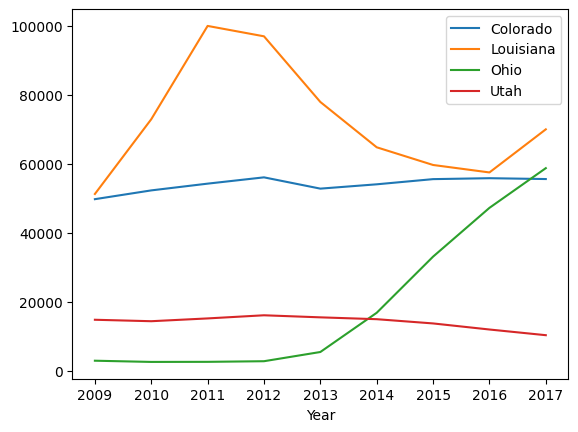

In [39]:
plot = filtered_yearly_gas_df.filter(items=['Colorado', 'Louisiana', 'Ohio', 'Utah']).plot()
plot.set_xlabel("Year");

---

## Comparing with Crude Oil Production

In [40]:
oil_df = pd.read_csv('data/U.S._crude_oil_production.csv', parse_dates=['Month'])

---

## Yearly Oil production

Index(['U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')


<AxesSubplot:xlabel='Year'>

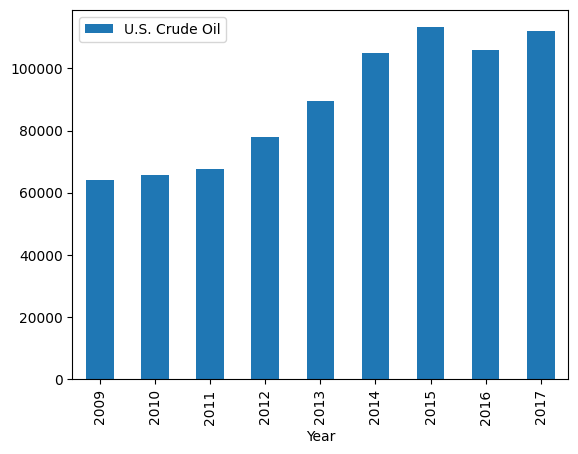

In [43]:
yearly_oil_df = oil_df.copy()
yearly_oil_df['Year'] = yearly_oil_df['Month'].dt.year
yearly_oil_df = yearly_oil_df.groupby('Year').sum()

print(yearly_oil_df.columns)

yearly_oil_df.columns = yearly_oil_df.columns.str.strip()
start_year = 2009
end_year = 2017
filtered_yearly_oil_df = yearly_oil_df[np.logical_and(yearly_oil_df.index >= start_year, yearly_oil_df.index <= end_year)]
filtered_yearly_oil_df.filter(items=['U.S. Crude Oil']).plot(kind='bar')

### Check your code

In [44]:
from nbresult import ChallengeResult

result = ChallengeResult('oil',
    filtered_oil_shape=filtered_yearly_oil_df.shape,
    filtered_oil_index_year=filtered_yearly_oil_df.index[0],
    us_total=filtered_yearly_oil_df.iloc[0,0]
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 3 items

test_oil.py::TestOil::test_df_has_the_right_index PASSED                 [ 33%]
test_oil.py::TestOil::test_df_has_the_right_shape PASSED                 [ 66%]
test_oil.py::TestOil::test_df_has_the_right_values PASSED                [100%]

============================== 3 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/oil.pickle

git commit -m 'Completed oil step'

git push origin master



## Merging Oil and Gas Production

In [45]:


plot = merged_df.plot(kind="bar")
plot.set_xlabel("Year")
plot.legend(['Gas (Millions of Cubic feet)', 'Crude Oil (Thousands of barrels)']);

NameError: name 'merged_df' is not defined